In [1]:
import pandas as pd 
import numpy as np
import os
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(os.path.join('https://web.stanford.edu/~hastie/ElemStatLearn//datasets/spam.data'), sep = ' ', header = None)

In [6]:

col = {}
for k in df.columns:
    if k == 57:
        col[k] = 'label'
    else:
        col[k] = 'col_'+str(k) 

data = df.rename(columns = col)
data

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_48,col_49,col_50,col_51,col_52,col_53,col_54,col_55,col_56,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# functions 

In [12]:

def TrainTestSplit(df, TestSize):
    
    if isinstance(TestSize, float):
        TestSize = round(TestSize * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=TestSize)

    Test = df.loc[test_indices] 
    Train = df.drop(test_indices) 
    
    return Train, Test  


def FindFeatureType(df):
    
    type_of_cols = []
    tresholdOfUniqueValue = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= tresholdOfUniqueValue):
                type_of_cols.append("categorical")
            else:
                type_of_cols.append("continuous")
    
    return type_of_cols


In [22]:
def ispure(data):
    
    target = data[:, -1]
    uniqueVal = np.unique(target)

    if len(uniqueVal) == 1:
        return True
    else:
        return False

    
def val_classify(data):
    
    target = data[:, -1]
    uniqueVal, counts_uniqueVal = np.unique(target, return_counts=True)

    index = counts_uniqueVal.argmax()
    classify = uniqueVal[index]
    
    return classify


def unique_values_cols(data, random_subspace):
    
    split_values_cols = {}
    _, n_columns = data.shape
    column_indices = list(range(n_columns - 1))    
    
    if random_subspace and random_subspace <= len(column_indices):
        column_indices = random.sample(population=column_indices, k=random_subspace)
    
    for col_idx in column_indices:          
        values = data[:, col_idx]
        unique_values = np.unique(values)
        
        split_values_cols[col_idx] = unique_values
    
    return split_values_cols



def Entropy(data):
    
    target = data[:, -1]
    _, counts = np.unique(target, return_counts=True)

    prob = counts / counts.sum()
    entropy = sum(prob * -np.log2(prob))
     
    return entropy


def cal_complete_entropy(LeftData, RightData):
    
    n = len(LeftData) + len(RightData)
    p_LeftData = len(LeftData) / n
    p_RightData = len(RightData) / n

    complete_entropy =  (p_LeftData * Entropy(LeftData) 
                      + p_RightData * Entropy(RightData))
    
    return complete_entropy


def Best_Split(data, split_values_cols):
    
    complete_entropy = 9999
    for col_idx in split_values_cols:
        for value in split_values_cols[col_idx]:
            LeftData, RightData = DataSplit(data, split_column=col_idx, split_value=value)
            current_complete_entropy = cal_complete_entropy(LeftData, RightData)
            
            if current_complete_entropy <= complete_entropy:
                complete_entropy = current_complete_entropy
                BestSplitColumn = col_idx
                BestSplitValue = value
    
    return BestSplitColumn,BestSplitValue

def DataSplit(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        LeftData = data[split_column_values <= split_value]
        RightData = data[split_column_values >  split_value]
    
     
    else:
        LeftData = data[split_column_values == split_value]
        RightData = data[split_column_values != split_value]
    
    return LeftData, RightData


In [28]:

def DecisionTreeAlgorithm(df, count=0, min_samples=2, max_depth=5, random_subspace=None):
    
    
    if count == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = FindFeatureType(df)
        data = df.values
    else:
        data = df           
    
    
    if (ispure(data)) or (len(data) < min_samples) or (count == max_depth):
        classify = val_classify(data)
        
        return classify
    
   
    else:    
        count += 1

         
        split_values_cols = unique_values_cols(data, random_subspace)
        split_column, split_value = Best_Split(data, split_values_cols)
        LeftData, RightData = DataSplit(data, split_column, split_value)
        
        
        if len(LeftData) == 0 or len(RightData) == 0:
            classify = val_classify(data)
            return classify
        
        
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            Question = "{} <= {}".format(feature_name, split_value)
            
        
        else:
            Question = "{} = {}".format(feature_name, split_value)
        
        
        SubTree = {Question: []}
        
       
        conditionTrue = DecisionTreeAlgorithm(LeftData, count, min_samples, max_depth, random_subspace)
        conditionFalse = DecisionTreeAlgorithm(RightData, count, min_samples, max_depth, random_subspace)
        
        
        if conditionTrue == conditionFalse:
            SubTree = conditionTrue
        else:
            SubTree[Question].append(conditionTrue)
            SubTree[Question].append(conditionFalse)
        
        return SubTree

In [29]:

def ExamplePrediction(example, tree):
    Question = list(tree.keys())[0]
    feature_name, comp_Oper, value = Question.split(" ")

    
    if comp_Oper == "<=":
        if example[feature_name] <= float(value):
            answer = tree[Question][0]
        else:
            answer = tree[Question][1]
    
    
    else:
        if str(example[feature_name]) == value:
            answer = tree[Question][0]
        else:
            answer = tree[Question][1]

    
    if not isinstance(answer, dict):
        return answer
    
    
    else:
        ResidualTree = answer
        return ExamplePrediction(example, ResidualTree)
    

def Prediction_of_decision_trees(test_df, tree):
    predictions = test_df.apply(ExamplePrediction, args=(tree,), axis=1)
    return predictions

def OOb_score(pred, y_test):
    wrong_label = 0
    for i in range(len(pred)):
        if pred[i] != y_test[i]:
            wrong_label += 1
    return wrong_label / len(y_test)

In [30]:
random.seed(0)
train_df, test_df = TrainTestSplit(data, TestSize=0.3)

In [31]:
def BootStrapping_Samples(train_df, n_bootstrap):
    bootstrappedIndices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrappedIndices]
    df_oob = train_df.iloc[~bootstrappedIndices]    
    return df_bootstrapped, df_oob


def RandomForestAlgorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    OOB_data = []
    OOB_score = []
    for i in range(n_trees):
        df_bootstrapped, df_oob = BootStrapping_Samples(train_df, n_bootstrap)
        tree = DecisionTreeAlgorithm(df_bootstrapped, max_depth=dt_max_depth, random_subspace=n_features)
        forest.append(tree)
        
        oob_pred = Prediction_of_decision_trees(df_oob, tree)
        oob_predicted = [int(i) for i in oob_pred]
        score = OOb_score(oob_predicted, df_oob.label.values)        
        
        OOB_score.append(score)
    
    return forest, np.mean(OOB_score)

def PredictionsOfRandomForest(test_df, forest):
    
    df_predictions = {}
    oob_pred_list = []
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        predictions = Prediction_of_decision_trees(test_df, tree=forest[i])
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    #print(df_predictions.head())
    PredictionsOfRandomForest = df_predictions.mode(axis=1)[0]
    
    return PredictionsOfRandomForest



## Training  my  own Random forest model

In [35]:
%%time
forest, Oob_estimate = RandomForestAlgorithm(train_df, n_trees=4, n_bootstrap=train_df.shape[0], n_features=30, dt_max_depth=4)
predictions = PredictionsOfRandomForest(test_df, forest)


Wall time: 57.5 s


In [36]:
def EvaluationMetric(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix
    acc = accuracy_score(test_df.label, predictions)
    print("Accuracy = {}".format(acc))
    
    cm1 = confusion_matrix(test_df.label, predictions)
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print("Sensitivity =", sensitivity)
    
    

In [37]:
EvaluationMetric(test_df, predictions)

Accuracy = 0.8521739130434782
Sensitivity = 0.9789081885856079


## Plot OOB error 



In [42]:
%%time
n_features = [8,18,28,38,48,57]
score = []
for feat in n_features:
    
    forest, Obb_estimate = RandomForestAlgorithm(train_df, n_trees=5, n_bootstrap=train_df.shape[0], n_features=feat, dt_max_depth=4)
    score.append(Obb_estimate)
    print("Obb estimates for number of features {} is {}".format(feat, Obb_estimate))

Obb estimates for number of features 8 is 0.1341819310773052
Obb estimates for number of features 18 is 0.10742005588326609
Obb estimates for number of features 28 is 0.10984166407947842
Obb estimates for number of features 38 is 0.10468798509779571
Obb estimates for number of features 48 is 0.09810617820552624
Obb estimates for number of features 57 is 0.10114871158025458
Wall time: 6min 53s


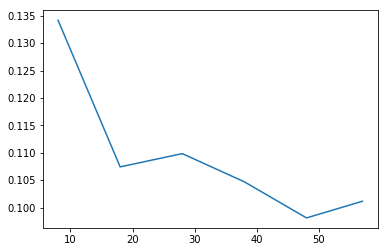

In [43]:
plt.plot(n_features, score)

In [45]:
%%time
n_features = [8,18,28,38,48,57]
for n_feat in n_features:
    print("Number of features choosed: ", n_feat)
     
    forest, oob_estimate = RandomForestAlgorithm(train_df, n_trees=4, n_bootstrap=800, n_features=30, dt_max_depth=4)
    
    predictions = PredictionsOfRandomForest(test_df, forest)
    
    EvaluationMetric(test_df.label, predictions)
    print("---------")

Number of features choosed:  8
Accuracy = 0.8826086956521739
Sensitivity = 0.9652605459057072
---------
Number of features choosed:  18
Accuracy = 0.8695652173913043
Sensitivity = 0.9143920595533499
---------
Number of features choosed:  28
Accuracy = 0.894927536231884
Sensitivity = 0.9751861042183623
---------
Number of features choosed:  38
Accuracy = 0.8913043478260869
Sensitivity = 0.9652605459057072
---------
Number of features choosed:  48
Accuracy = 0.8905797101449275
Sensitivity = 0.9503722084367245
---------
Number of features choosed:  57
Accuracy = 0.8681159420289855
Sensitivity = 0.9751861042183623
---------
Wall time: 52 s


# Fit a Inbuilt random forest classifier 

In [46]:
x_train, y_train = train_df.iloc[:,:-1], train_df.iloc[:,-1:]
x_test, y_test =  test_df.iloc[:,:-1], test_df.iloc[:,-1:]

In [50]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(x_train, y_train.label)
pred = clf.predict(x_test)

Wall time: 442 ms


In [51]:

EvaluationMetric(test_df.label, pred)

Accuracy = 0.8681159420289855
Sensitivity = 0.9751861042183623
